In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [13]:
df = pd.read_csv("crypto/cryptocurrencies.csv", thousands=',')

In [14]:
df.shape

(2265, 8)

In [15]:
df.dtypes

date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
market_cap      int64
coin           object
dtype: object

In [16]:
df.head()

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC


In [17]:
df.tail()

,date,open,high,low,close,volume,market_cap,coin
2260,17-Feb-17,13.07,13.34,13.04,13.30,1711010,182332000,XMR
2261,16-Feb-17,13.62,13.62,12.91,13.10,3256190,189926000,XMR
2262,15-Feb-17,13.01,13.74,12.88,13.62,4811600,181497000,XMR
2263,14-Feb-17,12.20,13.20,12.11,12.99,4166850,170135000,XMR
2264,13-Feb-17,12.31,12.36,12.09,12.20,1687590,171557000,XMR


In [18]:
df.coin.value_counts()

XRP      365
XMR      365
LTC      365
ETH      365
BTC      365
MIOTA    245
BCH      195
Name: coin, dtype: int64

In [19]:
# We're going to focus exclusively on Bitcoin
# We're actually just going to overwrite "df" with only that info, tossing the rest 
df = df[df.coin == 'BTC']

In [20]:
df.head()

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC


In [21]:
df.tail()

,date,open,high,low,close,volume,market_cap,coin
360,17-Feb-17,1026.12,1053.17,1025.64,1046.21,136474000,16589600000,BTC
361,16-Feb-17,1007.65,1033.37,1007.65,1027.44,122277000,16289100000,BTC
362,15-Feb-17,1006.21,1008.84,1001.58,1007.48,89759400,16264100000,BTC
363,14-Feb-17,991.74,1011.51,986.47,1004.55,137946000,16028000000,BTC
364,13-Feb-17,998.89,1002.10,976.00,990.64,100607000,16141500000,BTC


In [22]:
# Everything is described as a string because of the commas.
# df.close.str.replace(",","").astype(float)

# Or we can do it at import as seen up top

In [23]:
df.date.dtype

dtype('O')

In [25]:
# there is "parse dates" for csv import but maybe don't use / trust

# this is standard fix
# pd.to_datetime(df.date)


# this is verbose fix, to walk the fix through what is needed
# codes from here: http://strftime.org/
# 12-Feb-18  becomes  %d-%b-%y
pd.to_datetime(df.date, format="%d-%b-%y").head()

0   2018-02-12
1   2018-02-11
2   2018-02-10
3   2018-02-09
4   2018-02-08
Name: date, dtype: datetime64[ns]

In [26]:
# Set this as a new column:
df['datetime'] = pd.to_datetime(df.date, format="%d-%b-%y")

In [27]:
df.head()

,date,open,high,low,close,volume,market_cap,coin,datetime
0,12-Feb-18,8141.43,8985.92,8141.43,8926.57,6256440000,137258000000,BTC,2018-02-12
1,11-Feb-18,8616.13,8616.13,7931.10,8129.97,6122190000,145245000000,BTC,2018-02-11
2,10-Feb-18,8720.08,9122.55,8295.47,8621.90,7780960000,146981000000,BTC,2018-02-10
3,9-Feb-18,8271.84,8736.98,7884.71,8736.98,6784820000,139412000000,BTC,2018-02-09
4,8-Feb-18,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000,BTC,2018-02-08


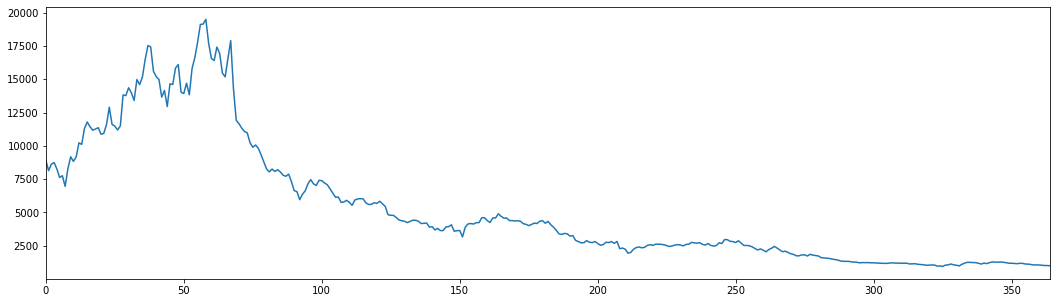

In [40]:
# whoops, wrong
df.close.plot(figsize=(18,5))

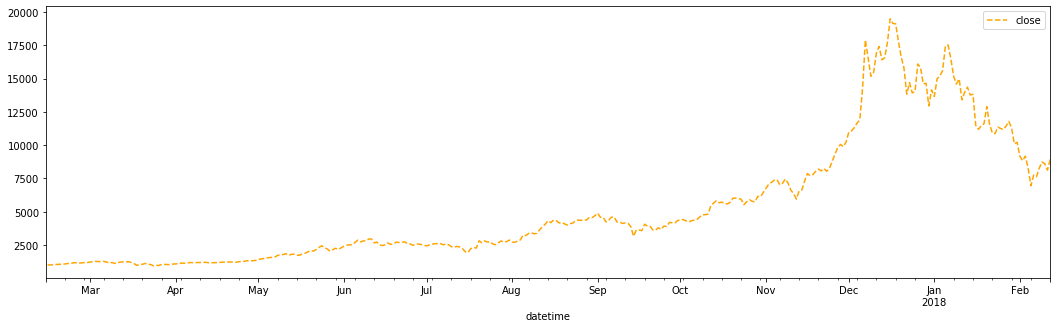

In [36]:
df.plot(x='datetime', y='close', color='orange', linestyle='--',figsize=(18,5))

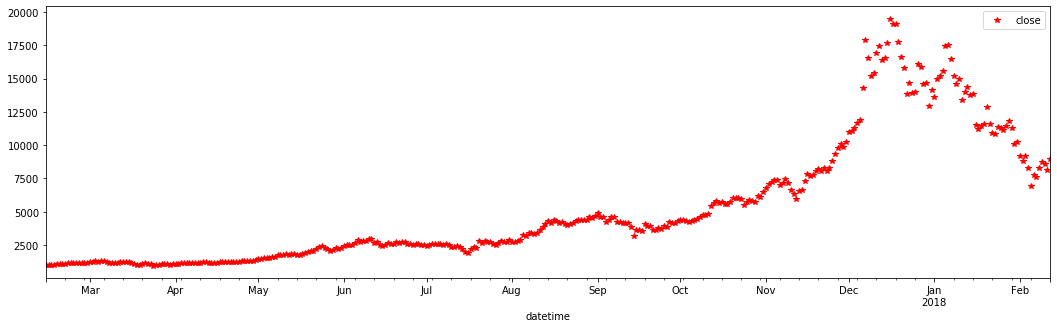

In [44]:
# Yay,fake scatterplot
df.plot(x='datetime', y='close', color='red', linestyle='', marker='*',figsize=(18,5))